# Ipython Notebook used for Predicting Income
The idea is to present the basics of Logistic Regression using Scikit learn 

**Dataset** https://www.kaggle.com/uciml/adult-census-income
---

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("dataset/adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Data Cleaning
According to the data, we see that there are many values that are unknown marked with "?"
We will remove those values for our analysis

We could put in place the median of the elements but for sakes of this example, the items will be removed

In [4]:
dataClean=data.where(data["workclass"]!="?")
dataClean.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,<=50K
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,<=50K


In [5]:
#Number of data to be removed
dataClean["age"].isnull().sum()

1836

In [6]:
#% of data to be removed
perc=dataClean["age"].isnull().sum()/float(len(data["age"]))*100
"{0:.0f}%".format(perc)

'6%'

In [7]:
#We could have used the same dataset but for this example I have separated them
dataClean=dataClean.dropna(subset=["age"])

### Final Dataset

In [8]:
dataClean.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,<=50K
5,34.0,Private,216864.0,HS-grad,9.0,Divorced,Other-service,Unmarried,White,Female,0.0,3770.0,45.0,United-States,<=50K
6,38.0,Private,150601.0,10th,6.0,Separated,Adm-clerical,Unmarried,White,Male,0.0,3770.0,40.0,United-States,<=50K


In [9]:
len(dataClean)

30725

## Categorical Variables
Scikit receives only numerical data, so we cannot have something line **female/male** in our response

There are multiple ways of handling this:
 * We could do it manually (as I will show in an example)
 * We could use the map function and manually assing a value to eache level
 * We can use the factorize function

#### Manually done

In [10]:
#First we determine what are the possible values sex can take
print dataClean["sex"].unique()

#We get the number of each one
no_females=dataClean["sex"][dataClean["sex"]=="Female"].count()
no_males=dataClean["sex"][dataClean["sex"]=="Male"].count()
print "The number of females is: " + str(no_females)
print "The number of males is: " + str(no_males)

['Female' 'Male']
The number of females is: 9932
The number of males is: 20793


In [11]:
#Now we change it to a categorical variable where 0 is men and 1 is women
dataClean.loc[data["sex"]=="Male","sex"]=0
dataClean.loc[data["sex"]=="Female","sex"]=1

In [12]:
#I want to see all column values
print dataClean.columns.values

['age' 'workclass' 'fnlwgt' 'education' 'education.num' 'marital.status'
 'occupation' 'relationship' 'race' 'sex' 'capital.gain' 'capital.loss'
 'hours.per.week' 'native.country' 'income']


In [13]:
print dataClean["education"].unique()

['HS-grad' '7th-8th' 'Some-college' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']


### Using the factorize
Pandas has a special function that returns a numerical value of each unique String it finds.

The name of the function is **factorize**

In [14]:
categEncodEd=pd.factorize(dataClean['education'])
print type(categEncodEd)
print len(categEncodEd)
print len(categEncodEd[0])

<type 'tuple'>
2
30725


In [15]:
print np.unique(categEncodEd[0])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [16]:
dataClean['education']=categEncodEd[0]
print dataClean["education"].head()

1    0
3    1
4    2
5    0
6    3
Name: education, dtype: int32


#### Manual Assignment
We can do this using a loop but to show it explicitly I will do it manually for each column

In [17]:
categEncodRac=pd.factorize(dataClean['race'])
categEncodOcu=pd.factorize(dataClean['occupation'])
categEncodMar=pd.factorize(dataClean['marital.status'])
categEncodWC=pd.factorize(dataClean['workclass'])
categEncodNC=pd.factorize(dataClean['native.country'])
categEncodRel=pd.factorize(dataClean['relationship'])
categEncodInc=pd.factorize(dataClean['income'])

In [18]:
dataClean['race']=categEncodRac[0]
dataClean['occupation']=categEncodOcu[0]
dataClean['marital.status']=categEncodMar[0]
dataClean['workclass']=categEncodWC[0]
dataClean['native.country']=categEncodNC[0]
dataClean['relationship']=categEncodRel[0]
dataClean['income']=categEncodInc[0]

In [19]:
dataClean.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82.0,0,132870.0,0,9.0,0,0,0,0,1,0.0,4356.0,18.0,0,0
3,54.0,0,140359.0,1,4.0,1,1,1,0,1,0.0,3900.0,40.0,0,0
4,41.0,0,264663.0,2,10.0,2,2,2,0,1,0.0,3900.0,40.0,0,0
5,34.0,0,216864.0,0,9.0,1,3,1,0,1,0.0,3770.0,45.0,0,0
6,38.0,0,150601.0,3,6.0,2,4,1,0,0,0.0,3770.0,40.0,0,0


In [20]:
dataClean.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# Making Predictions
First we start with **Logistic Regression**

This type of regression is very handy in this case because it gives us a 0 or 1 solution to the problem, in this case it says wethere or not the income is higher than 50K

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, train_test_split
from sklearn import cross_validation


In [22]:
x=dataClean.columns.values
x=x[:14]
x_train, x_test, y_train, y_test=train_test_split(dataClean[x],dataClean['income']) 

In [23]:
linreg=LogisticRegression()

In [24]:
linreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
print linreg.intercept_
print linreg.coef_

[-0.00093689]
[[ -6.16878912e-03   7.29720322e-04  -3.26525568e-06   1.70026575e-04
   -1.88656204e-03   5.37295381e-04  -7.41094719e-03   4.44603946e-03
   -5.82768244e-04  -1.33804618e-03   3.40712080e-04   7.77209464e-04
   -9.88812066e-03  -1.95502146e-03]]


In [26]:
zip(dataClean[x],linreg.coef_)

[('age', array([ -6.16878912e-03,   7.29720322e-04,  -3.26525568e-06,
           1.70026575e-04,  -1.88656204e-03,   5.37295381e-04,
          -7.41094719e-03,   4.44603946e-03,  -5.82768244e-04,
          -1.33804618e-03,   3.40712080e-04,   7.77209464e-04,
          -9.88812066e-03,  -1.95502146e-03]))]

In [27]:
y_pred=linreg.predict(x_test)

### Testing Accuracy

In [28]:
boolean=y_test==y_pred
#True values are taken as "1" so we can sum them
#Float is used so we don't get an integer as a response
accuracy=sum(boolean)/float(y_pred.shape[0])

#We print it with 2 decimal values
print "{0:.2f}%".format(accuracy * 100)

79.03%


## Feature Selection

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif
predictors = x
# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(dataClean[predictors], dataClean["income"])

1        0
3        0
4        0
5        0
6        0
7        1
8        0
9        1
10       1
11       1
12       1
13       1
15       1
16       1
17       1
18       1
19       1
20       1
21       0
22       0
23       0
25       0
26       0
27       0
28       1
29       1
30       1
31       1
32       1
33       1
        ..
32525    0
32526    0
32527    0
32529    0
32530    0
32531    0
32532    0
32535    1
32536    1
32537    0
32538    0
32539    1
32540    0
32542    0
32545    0
32546    0
32547    1
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    0
32555    1
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, dtype: int32


In [30]:
# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)
print zip(x,scores)

[('age', inf), ('workclass', 87.920680892613845), ('fnlwgt', 1.0165765457616809), ('education', 74.046202261340582), ('education.num', inf), ('marital.status', inf), ('occupation', 109.20000267366666), ('relationship', inf), ('race', 30.699634998300908), ('sex', 322.19227199080899), ('capital.gain', inf), ('capital.loss', 156.39654800549729), ('hours.per.week', inf), ('native.country', 7.120575871974852)]


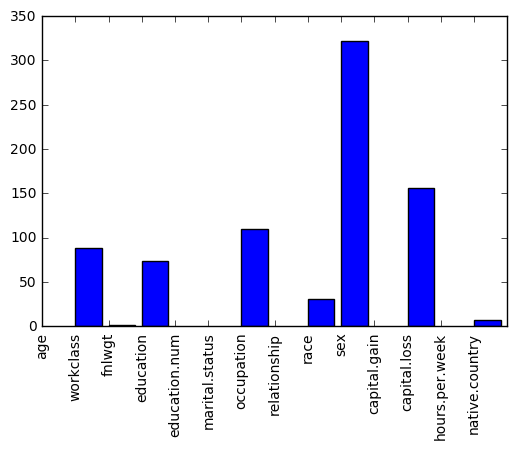

In [31]:
%matplotlib inline
# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [32]:
x_select=['age']

In [33]:
x_train, x_test, y_train, y_test=train_test_split(dataClean[x],dataClean['income']) 
linreg=LogisticRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)

boolean=y_test==y_pred
#True values are taken as "1" so we can sum them
#Float is used so we don't get an integer as a response
accuracy=sum(boolean)/float(y_pred.shape[0])

#We print it with 2 decimal values
print "{0:.2f}%".format(accuracy * 100)

79.47%


## Using Gradient Booster Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier().fit(x_train, y_train)

In [35]:
print"GBC %s" % gbc.score(x_test, y_test)

GBC 0.861103879198
